# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document

In [ ]:
#Sarel Baruch ID 314753666
# Shahar Ratsabi ID 318802725


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\sarel\Downloads


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

### Tokenize to Hebrew words

In [10]:

def tokenizer(hebrew_str):
    tkn = ht.tokenize(hebrew_str)
    tkn_list = list(filter(lambda x :(x[0] == 'HEBREW') and (len(x[1]) > 1),tkn))
    tkn_list = [tupel[1] for tupel in tkn_list]
    return tkn_list

### Convert values to binary('f' = 0, 'm' = 1)

In [11]:
df_train['gender'] = (df_train['gender'] == 'm').astype(int)

### Split the training data to featuer vectors and target label

In [12]:
X_train = df_train['story']
y_train = df_train['gender']

X_train.head(5)
y_train.head(5)

0    כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...
1    לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...
2    מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...
3    כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...
4    ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...
Name: story, dtype: object

0    1
1    1
2    0
3    1
4    0
Name: gender, dtype: int32

# Find the best model 

### SGD

In [13]:
SGDClassifier_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', SGDClassifier(random_state=42))
])

SGDClassifier_vec = Pipeline([
    ('vec', CountVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', SGDClassifier(random_state=42))
])

SGDClassifier_param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [1000, 2000, 3000]
}

sgd_count_param_grid = {
    'vec__max_df': [0.5, 0.75, 1.0],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__max_iter': [1000, 2000, 3000]
}

### KNN

In [14]:
knn_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', KNeighborsClassifier())
])

knn_vec = Pipeline([
    ('vec', CountVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', KNeighborsClassifier())
])

knn_params = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2]
}


### Naive Bayes

In [15]:
NB_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', MultinomialNB())
])

NB_vec = Pipeline([
    ('vec', CountVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('clf', MultinomialNB())
])

NB_param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}

NB_count_param_grid = {
    'vec__max_df': [0.5, 0.75, 1.0],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}

### LinearSVC

In [16]:
svc_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('classifier', LinearSVC())
])

svc_vec = Pipeline([
    ('vec', CountVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('classifier', LinearSVC())
])

svc_param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [1000, 2000, 3000]
}

svc_count_param_grid = {
    'vec__max_df': [0.5, 0.75, 1.0],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [1000, 2000, 3000]
}

### Decision Tree

In [17]:
dt_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('classifier', DecisionTreeClassifier())
])

dt_vec = Pipeline([
    ('vec', CountVectorizer(tokenizer=tokenizer)),
    ('normalize', preprocessing.Normalizer(norm='l2')),
    ('classifier', DecisionTreeClassifier())
])

dt_params = {
    'classifier__max_depth': [None, 2, 3, 4, 5],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [None, 1, 2, 3]
}

In [18]:
def df_scores(pipelines):
    names = []
    scores = []
    best_model=None
    best_f1_score= 0 
    
    for name, pipeline, param_grid in pipelines:
        print(f"Evaluating {name} model...")
        grid_search = GridSearchCV(pipeline, param_grid, cv=10,scoring='f1_macro',n_jobs = -1)
        grid_search.fit(X_train, y_train)
        print(f"Best hyperparameters: {grid_search.best_params_}")
        print("CV score=%0.3f" % grid_search.best_score_)
        names.append(name)
        scores.append(grid_search.best_score_)
        if grid_search.best_score_ > best_f1_score:
            best_f1_score = grid_search.best_score_
            best_model = grid_search.best_estimator_
    df = pd.DataFrame({'model':names,'score':scores})
    return  df,best_model,best_f1_score

### Find best model

In [19]:
pipelines_tfidf = [
    ('SGDClassifier', SGDClassifier_tfidf, SGDClassifier_param_grid),
    ('KNN',knn_tfidf,knn_params),
    ('Decision Tree',dt_tfidf,dt_params),
    ('Naive Bayes', NB_tfidf, NB_param_grid),
    ('Linear SVC', svc_tfidf, svc_param_grid)
]

pipelines_vec = [
    ('SGDClassifier', SGDClassifier_vec, sgd_count_param_grid),
    ('Linear SVC', svc_vec, svc_count_param_grid),
    ('Naive Bayes', NB_vec, NB_count_param_grid),
    ('KNN',knn_vec,knn_params),
    ('Decision Tree',dt_vec,dt_params)

]

print("TfidfVectorizer")
df_tfidf,best_model_tfidf, best_score_tfidf = df_scores(pipelines_tfidf) 

print("CountVectorizer")
df_vec,best_model_vec,best_score_vec = df_scores(pipelines_vec)




TfidfVectorizer
Evaluating SGDClassifier model...
Best hyperparameters: {'clf__alpha': 0.0001, 'clf__max_iter': 1000, 'clf__penalty': 'l1', 'tfidf__max_df': 0.75}
CV score=0.700
Evaluating KNN model...
Best hyperparameters: {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'distance'}
CV score=0.608
Evaluating Decision Tree model...
Best hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4}
CV score=0.622
Evaluating Naive Bayes model...
Best hyperparameters: {'clf__alpha': 0.01, 'tfidf__max_df': 0.5}
CV score=0.508
Evaluating Linear SVC model...
Best hyperparameters: {'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'tfidf__max_df': 0.75}
CV score=0.642
CountVectorizer
Evaluating SGDClassifier model...
Best hyperparameters: {'clf__alpha': 0.0001, 'clf__max_iter': 1000, 'clf__penalty': 'elasticnet', 'vec__max_df': 0.75}
CV score=0.703
Evaluating Linear SVC model...
Best hyperparameters: {

In [20]:
df_tfidf

,model,score
0,SGDClassifier,0.700
1,KNN,0.608
2,Decision Tree,0.622
3,Naive Bayes,0.508
4,Linear SVC,0.642


In [21]:
df_vec

,model,score
0,SGDClassifier,0.703
1,Linear SVC,0.673
2,Naive Bayes,0.479
3,KNN,0.558
4,Decision Tree,0.593


In [22]:
merged_df = pd.merge(df_tfidf, df_vec, on='model')
merged_df.rename(columns={'score_x': 'score_tfidf', 'score_y': 'score_vec'},inplace=True)

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Comparison of Scores: TF-IDF vs CountVectorizer')

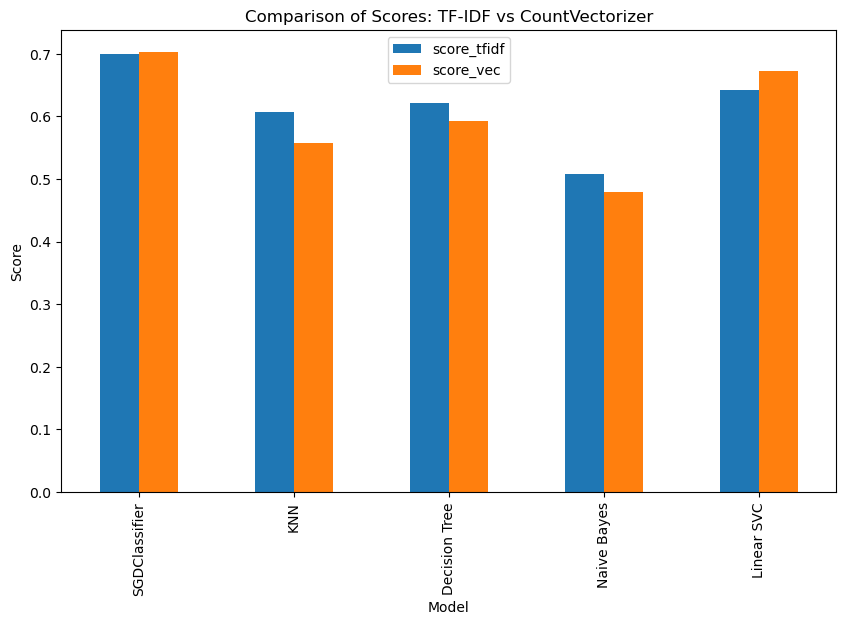

In [23]:
df = merged_df.set_index('model')

# Plot the bar plot
ax = df.plot(kind='bar', figsize=(10, 6))

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Scores: TF-IDF vs CountVectorizer')


# Display the plot
plt.show()

##  Calculate the average F1 score using cross-validation


In [24]:
if(best_score_vec>best_score_tfidf):
    best_model = best_model_vec
else:
    best_model = best_model_tfidf
    
best_model.fit(X_train,y_train)
f1_scores = cross_val_score(best_model, X_train,y_train, cv=10, scoring='f1_macro')
avg_f1_score = np.mean(f1_scores)
print("Average F1 score:", avg_f1_score)

Pipeline(steps=[('vec',
                 CountVectorizer(max_df=0.75,
                                 tokenizer=<function tokenizer at 0x000001C35E28B940>)),
                ('normalize', Normalizer()),
                ('clf', SGDClassifier(penalty='elasticnet', random_state=42))])

Average F1 score: 0.7030620752858006


In [25]:
# use the best estimator model for learning
y_pred = best_model.predict(df_test["story"])
y_pred = np.where(y_pred == 1, 'm', 'f')
pd.DataFrame({'id_test': df_test["test_example_id"], 'y_pred': y_pred}).head(5)
pd.DataFrame({'id_test': df_test["test_example_id"], 'y_pred': y_pred}).tail(5)

,id_test,y_pred
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f


,id_test,y_pred
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


In [26]:
# create dataframe with the test results
df_predicted = pd.DataFrame(
    {'test_example_id': df_test['test_example_id'], 'predicted_category': y_pred})
df_predicted

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f
...,...,...
318,318,m
319,319,m
320,320,m
321,321,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [27]:
#df_predicted.to_csv('classification_results.csv',index=False)